## DBSCAN Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
from sklearn.preprocessing import StandardScaler

/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
class DBSCAN(object):
    UN_CLASSIFIED = 0
    NOISE = -1

    UN_VISITED = 0
    VISITED = 1

    def __init__(self, eps, min_pts):
        self.eps = eps
        self.minPts = min_pts
        self.n_cluster = 1

    def fit(self, X):
        self._train(X)

    def _train(self, X):
        n = X.shape[0]
        self.labels_ = np.array([DBSCAN.UN_CLASSIFIED] * n)
        visited = DBSCAN.UN_VISITED * np.ones(n)

        left_classified, = np.where(visited == DBSCAN.UN_VISITED)
        while len(left_classified) != 0:
            x_idx = left_classified[0]

            visited[x_idx] = DBSCAN.VISITED # mark visited
            start_point = X[x_idx, :]
            n_neighbors, pts = self.get_neighbors(X, start_point)

            if n_neighbors < self.minPts:
                self.labels_[x_idx] = DBSCAN.NOISE
            else:
                self.labels_[x_idx] = self.n_cluster
                while len(pts) != 0:
                    neighor_id = pts[0]
                    pts = np.delete(pts, np.where(pts == neighor_id))
                    if visited[neighor_id] == DBSCAN.UN_VISITED:
                        visited[neighor_id] = DBSCAN.VISITED # mark visited
                        n_new_neighors, new_pts = self.get_neighbors(X, X[neighor_id])

                        if n_new_neighors >= self.minPts:
                            pts = np.concatenate((pts, new_pts), axis=None)

                    if self.labels_[neighor_id] == DBSCAN.UN_CLASSIFIED:
                        self.labels_[neighor_id] = self.n_cluster

                self.n_cluster += 1

            left_classified, = np.where(visited == DBSCAN.UN_VISITED)

    def get_neighbors(self, X, pt):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        count, = np.where(dist <= self.eps)
        return len(count), neighors[:len(count)]
    
    @staticmethod
    def k_nearest_neighbour(X, pt, k):
        dist = np.linalg.norm(X - pt, 2, axis=1)
        neighors = np.argsort(dist)
        k_dist = dist[neighors[k]]
        return k_dist

    @classmethod
    def plot_param_est_curve(cls, data, k_nn):
        y = sorted([DBSCAN.k_nearest_neighbour(data, pt, k_nn) for pt in data])
        # plot
        plt.plot([id_ for id_ in range(len(data))], y, marker='o')
        plt.rcParams["figure.figsize"] = [8,8]
        plt.xlabel('Points sorted according to k={} nearest neighour'.format(k_nn))
        plt.ylabel('k={} Nearest Distance'.format(k_nn))
            

In [3]:
data = pd.read_pickle('./state_clubbed_df.pickle')
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,35.0,84.0,0.0,57.0,7.0,22.0,12.0,0.0,6.0,47.0,270.0
1,arunachal pradesh,2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,assam,2001,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0
3,bihar,2001,2.0,16.0,0.0,26.0,0.0,1.0,16.0,1.0,2.0,18.0,83.0
4,chhattisgarh,2001,14.0,150.0,5.0,46.0,1.0,15.0,0.0,0.0,0.0,354.0,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,2.0,2.0,0.0,14.0,0.0,2.0,0.0,0.0,0.0,2.0,35.0
523,daman & diu,2015,1.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0
524,delhi,2015,54.0,927.0,3.0,6881.0,0.0,23.0,0.0,6.0,0.0,231.0,9489.0
525,lakshadweep,2015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [4]:
all_headers = data.columns
all_headers

Index(['state', 'year', 'murder', 'rape', 'foeticide',
       'kidnapping and abduction', 'abetment of suicide',
       'exposure and abandonment', 'procuration of minor girls',
       'selling girls for prostitution', 'prohibition of child marriage act',
       'other crimes', 'total'],
      dtype='object')

In [5]:
cols_to_norm = all_headers[2:-1]
print (cols_to_norm)

Index(['murder', 'rape', 'foeticide', 'kidnapping and abduction',
       'abetment of suicide', 'exposure and abandonment',
       'procuration of minor girls', 'selling girls for prostitution',
       'prohibition of child marriage act', 'other crimes'],
      dtype='object')


In [6]:
data[cols_to_norm] = StandardScaler().fit_transform(data[cols_to_norm])
data

,state,year,murder,rape,foeticide,kidnapping and abduction,abetment of suicide,exposure and abandonment,procuration of minor girls,selling girls for prostitution,prohibition of child marriage act,other crimes,total
0,andhra pradesh,2001,-0.088951,-0.293383,-0.422895,-0.331227,0.899853,-0.024876,-0.085015,-0.183679,0.287960,-0.288916,270.0
1,arunachal pradesh,2001,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,0.0
2,assam,2001,-0.518114,-0.556170,-0.422895,-0.372629,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,18.0
3,bihar,2001,-0.493590,-0.506115,-0.422895,-0.364137,-0.281905,-0.417052,-0.041155,-0.092531,-0.198824,-0.349356,83.0
4,chhattisgarh,2001,-0.346449,-0.086907,0.247176,-0.342905,-0.113082,-0.155602,-0.216594,-0.183679,-0.442216,0.350914,585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-0.493590,-0.549913,-0.422895,-0.376876,-0.281905,-0.398377,-0.216594,-0.183679,-0.442216,-0.382702,35.0
523,daman & diu,2015,-0.505852,-0.556170,-0.422895,-0.369445,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.386870,28.0
524,delhi,2015,0.144024,2.343874,-0.020852,6.913125,-0.281905,-0.006201,-0.216594,0.363206,-0.442216,0.094565,9489.0
525,lakshadweep,2015,-0.518114,-0.556170,-0.422895,-0.391738,-0.281905,-0.435728,-0.216594,-0.183679,-0.442216,-0.384786,2.0


In [7]:
from sklearn.decomposition import PCA

In [8]:
n_features = len(cols_to_norm)
n_features

10

([<matplotlib.axis.XTick at 0x7fbe57471650>,
 <a list of 10 Text xticklabel objects>)

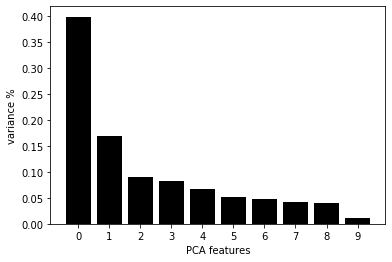

In [9]:
pca = PCA(n_components=n_features)
principal_components = pca.fit_transform(data[cols_to_norm])
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [10]:
PCA_components = pd.DataFrame(principal_components)
PCA_components = pd.concat([data[all_headers[:2]], PCA_components], axis=1)
PCA_components

,state,year,0,1,2,3,4,5,6,7,8,9
0,andhra pradesh,2001,-0.228578,0.050406,-0.015284,0.077617,1.136721,0.092307,-0.091301,-0.145122,-0.089485,0.033815
1,arunachal pradesh,2001,-1.230578,-0.237921,0.052646,0.128528,0.026222,0.005559,-0.038765,-0.058334,0.084726,-0.047396
2,assam,2001,-1.224106,-0.236560,0.063344,0.124093,0.021058,0.006804,-0.048214,-0.063043,0.084377,-0.054286
3,bihar,2001,-1.098062,0.019818,-0.019305,0.059215,0.049078,0.067003,-0.063323,0.000515,0.120980,-0.030040
4,chhattisgarh,2001,-0.259834,-0.514825,-0.238040,0.487728,-0.216056,0.063617,0.073489,0.120414,0.188045,-0.097552
...,...,...,...,...,...,...,...,...,...,...,...,...
522,d&n haveli,2015,-1.199630,-0.241129,0.050680,0.107484,0.023192,-0.005381,-0.024836,-0.079391,0.077469,-0.053733
523,daman & diu,2015,-1.218726,-0.236485,0.069565,0.118951,0.021436,0.005134,-0.041887,-0.060349,0.080739,-0.056002
524,delhi,2015,3.331256,0.160154,4.280642,-1.419158,-2.641531,-0.006094,-3.416160,-1.727422,0.523969,-0.633911
525,lakshadweep,2015,-1.229735,-0.238179,0.052339,0.129081,0.026050,0.005640,-0.038320,-0.057920,0.086116,-0.048306


<module 'matplotlib.pyplot' from '/home/pranjal/.local/share/virtualenvs/crime-analysis-report-pk3Cf-oK/lib/python3.7/site-packages/matplotlib/pyplot.py'>

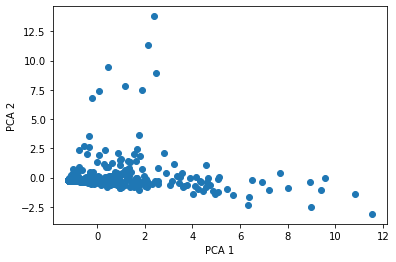

In [11]:
plt.scatter(PCA_components[0], PCA_components[1])
plt.li
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt

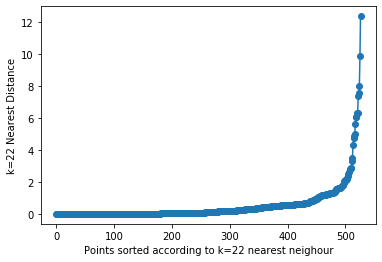

In [12]:
DBSCAN.plot_param_est_curve(PCA_components.loc[:, [0,1]].to_numpy(), 22)

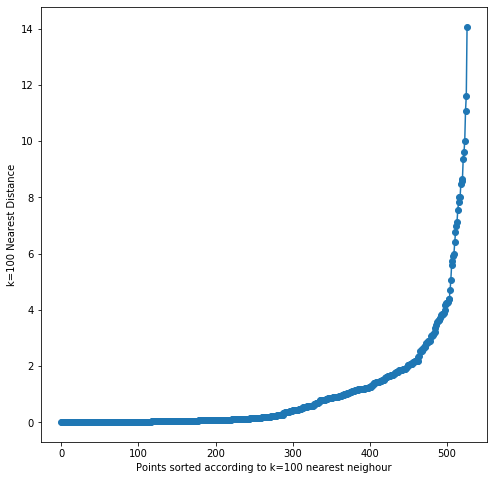

In [13]:
DBSCAN.plot_param_est_curve(PCA_components.loc[:, [0,1]].to_numpy(), 100)

In [18]:
clusterer = DBSCAN(eps=2, min_pts=22)
clusterer.fit(PCA_components.loc[:, [0,1]].to_numpy())

Text(0, 0.5, 'PCA 2')

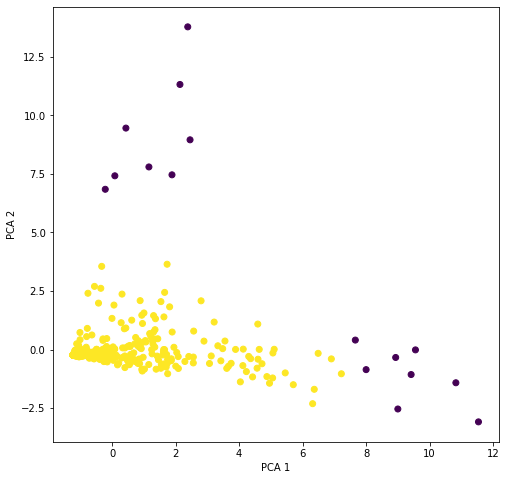

In [19]:
plt.scatter(PCA_components[0], PCA_components[1], c=clusterer.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [20]:
clusterer = DBSCAN(eps=2, min_pts=100)
clusterer.fit(PCA_components.loc[:, [0,1]].to_numpy())

Text(0, 0.5, 'PCA 2')

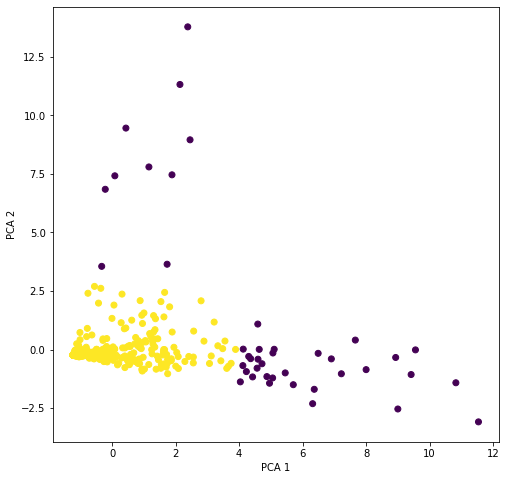

In [21]:
plt.scatter(PCA_components[0], PCA_components[1], c=clusterer.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [22]:
clusterer = DBSCAN(eps=2, min_pts=50)
clusterer.fit(PCA_components.loc[:, [0,1]].to_numpy())

Text(0, 0.5, 'PCA 2')

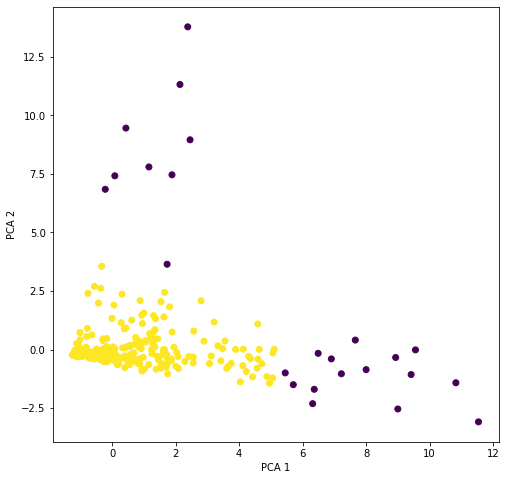

In [23]:
plt.scatter(PCA_components[0], PCA_components[1], c=clusterer.labels_)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')